In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("Base.csv")
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [7]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [9]:
# Convertir variables categóricas a tipo 'category'
df['payment_type'] = df.payment_type.astype('category')
df['employment_status'] = df.employment_status.astype('category')
df['housing_status'] = df.housing_status.astype('category')
df['source'] = df.source.astype('category')
df['device_os'] = df.device_os.astype('category')

In [11]:
# Aplicar One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [13]:
print(df.dtypes.value_counts())

bool       21
int64      18
float64     9
Name: count, dtype: int64


In [15]:
print(df.select_dtypes(exclude=['number']).columns)  # Debería devolver un índice vacío

Index(['payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'housing_status_BF',
       'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11'],
      dtype='object')


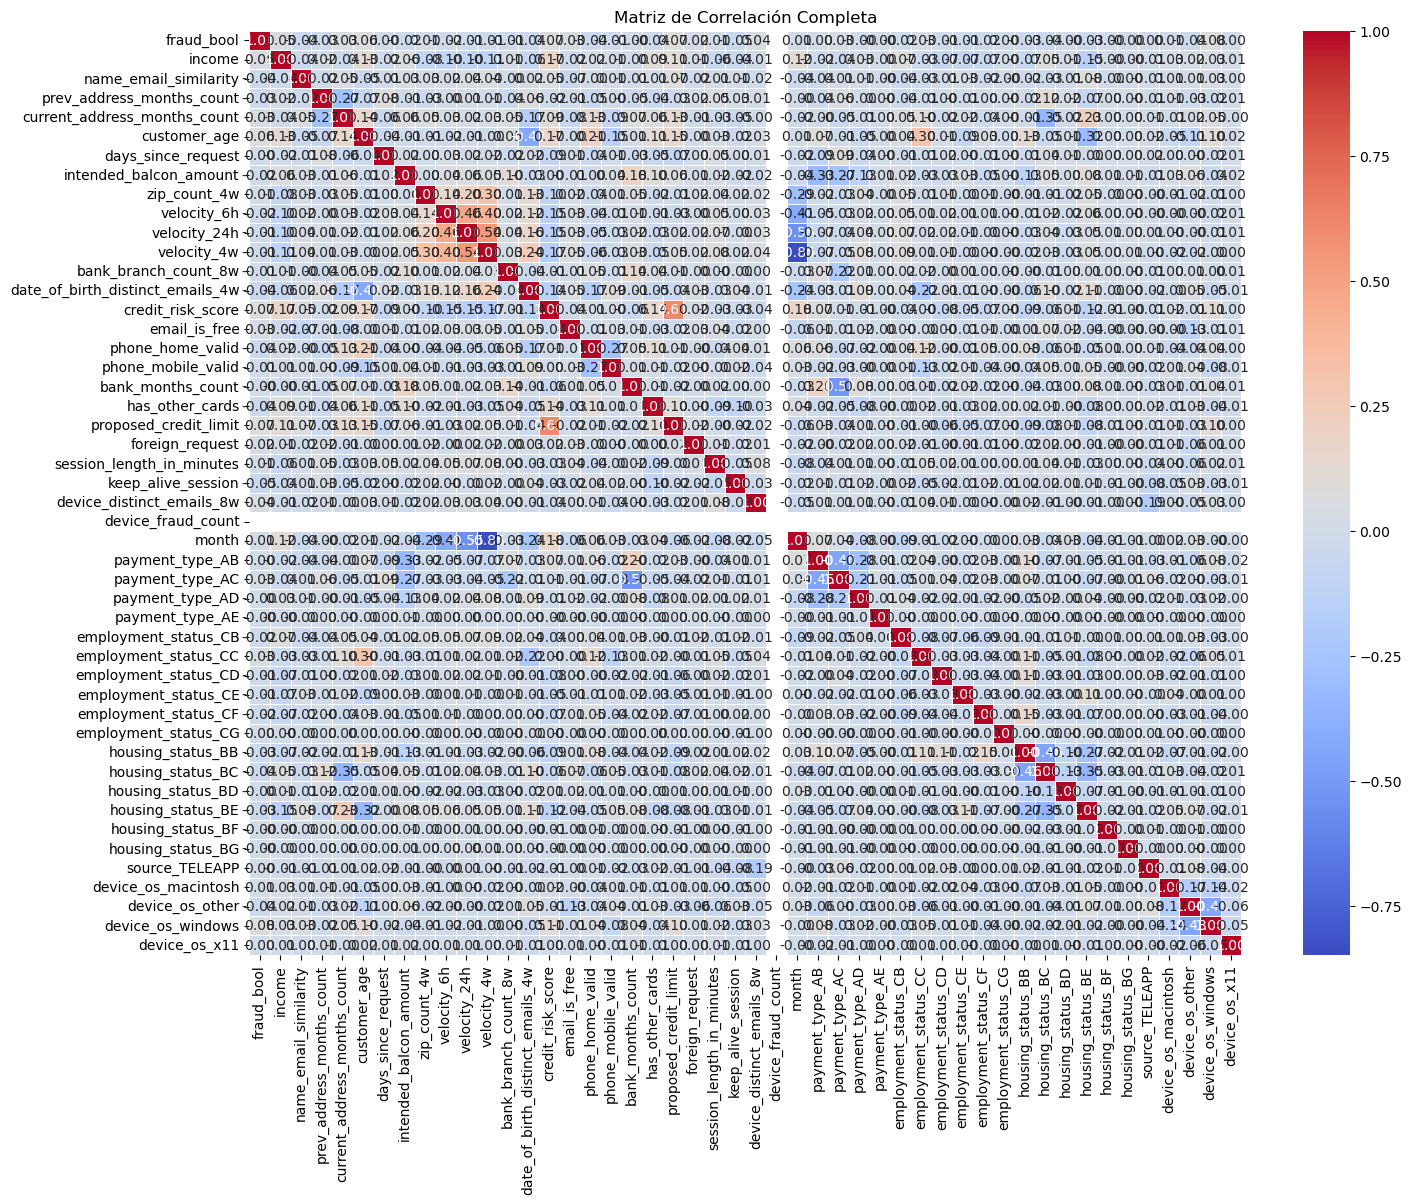

In [13]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))  # Ajusta el tamaño según tu número de variables
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Completa")
plt.show()

In [21]:
# Analizamos correlación alta entre variables
corr_matrix = df.corr().abs()
high_corr_vars = (corr_matrix > 0.8).sum() - 1  # Restamos 1 para ignorar la diagonal
print(high_corr_vars[high_corr_vars > 0])  # Solo mostramos las que tienen alta correlación

velocity_4w    1
month          1
dtype: int64


In [27]:
# Analizamos variables con correlación baja
cor_target = df.corr()["fraud_bool"].abs()
low_corr_features = cor_target[cor_target < 0.1].index  # Variables con baja correlación
print("Variables con baja correlación:", low_corr_features.tolist())

Variables con baja correlación: ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [25]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']

In [13]:
# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# Verificar las formas de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700000, 47) (300000, 47) (700000,) (300000,)


In [17]:
# Entrenar el modelo con RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Realizar predicciones
predictions = classifier.predict(X_test)

In [21]:
# Evaluar el modelo: Matriz de confusión y reporte de clasificación
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[296690      1]
 [  3303      6]]


In [25]:
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296691
           1       0.86      0.00      0.00      3309

    accuracy                           0.99    300000
   macro avg       0.92      0.50      0.50    300000
weighted avg       0.99      0.99      0.98    300000



In [ ]:
#1. Clasificación de la clase "0" (No fraude)
Precisión (Precision): 0.99
Esto significa que el 99% de las veces que el modelo predice "no fraude", está en lo cierto. Es decir, el modelo tiene una alta tasa de aciertos cuando clasifica como "no fraude".

Recall (Sensibilidad): 1.00
El recall indica que el modelo está clasificando correctamente el 100% de los casos de no fraude. Esto sugiere que el modelo no está cometiendo errores al clasificar "no fraude".

F1-Score: 0.99
La puntuación F1 es bastante alta para esta clase, lo que indica que el modelo tiene un buen balance entre precisión y recall para la clase "no fraude".

Support: 296,691
Hay 296,691 instancias de la clase "no fraude" en el conjunto de datos.

2. Clasificación de la clase "1" (Fraude)
Precisión (Precision): 0.86
Esto significa que cuando el modelo predice "fraude", está en lo cierto el 86% de las veces. Aunque es relativamente buena, no es tan alta como la de la clase "no fraude".

Recall (Sensibilidad): 0.00
El recall de 0.00 indica que el modelo no está identificando ningún caso de fraude (falsos negativos). Esto significa que, aunque el modelo podría estar prediciendo correctamente algunos casos de no fraude, está fallando completamente en detectar los fraudes, lo cual es un gran problema para una tarea de detección de fraude.

F1-Score: 0.00
La puntuación F1 para la clase "fraude" es 0.00 debido a que el recall es 0. Esto refleja la incapacidad del modelo para identificar correctamente los fraudes.

Support: 3,309
Hay 3,309 instancias de la clase "fraude" en el conjunto de datos.

3. Precisión general (Accuracy):
Accuracy: 0.99
El modelo tiene una precisión global del 99%, lo que indica que la mayoría de las predicciones son correctas. Sin embargo, esta alta precisión se debe en gran parte a la clase "no fraude", que es la clase mayoritaria.

4. Promedio macro y ponderado (Macro y Weighted Average)
Macro Avg:

Precisión: 0.92

Recall: 0.50

F1-Score: 0.50

El promedio macro trata cada clase de igual manera, sin tener en cuenta su frecuencia. Aquí se observa que, aunque la precisión es alta, el recall es muy bajo (50%) debido al pobre rendimiento del modelo en la detección de fraudes. Esto se refleja también en el F1-Score, que es bajo.

Weighted Avg:

Precisión: 0.99

Recall: 0.99

F1-Score: 0.98

El promedio ponderado tiene en cuenta la proporción de cada clase en el conjunto de datos. Dado que hay muchas más instancias de la clase "no fraude", el promedio ponderado muestra resultados muy buenos para la precisión y recall, aunque el recall para fraude sigue siendo bajo.

Análisis y conclusiones:
Problema de desbalance de clases: El modelo está subestimando por completo los casos de fraude, lo que es común en problemas con clases desbalanceadas, como la detección de fraude. La clase "no fraude" es mucho más frecuente que la clase "fraude", lo que provoca que el modelo prediga en su mayoría la clase mayoritaria.

Acción recomendada: Aquí es crucial mejorar el recall para la clase de fraude. Algunas posibles acciones que podrías considerar son:

Reentrenar con balanceo de clases: Utilizar técnicas como SMOTE o undersampling para igualar el número de instancias de las clases.

Ajustar el umbral de decisión: Puedes ajustar el umbral que se utiliza para clasificar los casos como fraude o no fraude. Esto puede aumentar el recall de la clase "fraude", pero puede reducir la precisión.

Probar con otros modelos: Algunos algoritmos, como Random Forest o XGBoost, manejan mejor los desbalances de clases.

Técnicas avanzadas de ajuste de clases: Usar modelos de cost-sensitive learning o penalización de clases para hacer que los fraudes tengan un mayor peso durante el entrenamiento.